<a href="https://colab.research.google.com/github/Devansharma/Flight_Price_Prediction/blob/master/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_excel('/Data_Train.xlsx')
test_df = pd.read_excel('/Test_set.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df = train_df.append(test_df, sort=False)

In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [5]:
df.shape

(13354, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [9]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [10]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [11]:
df = df.drop(['Date_of_Journey'],axis=1)

In [12]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [13]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [14]:
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')

In [15]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [16]:
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]

In [17]:
df['Stop'] = df['Stop'].astype(int)

In [18]:
df = df.drop(['Total_Stops'],axis=1)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [20]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

In [21]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

In [22]:
df = df.drop(['Arrival_Time'], axis=1)

In [23]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [24]:
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)
df = df.drop(['Dep_Time'], axis=1)

In [27]:
df['Route_1'] = df['Route'].str.split('→ ').str[0]

In [28]:
df['Route_2'] = df['Route'].str.split('→ ').str[1]
df['Route_3'] = df['Route'].str.split('→ ').str[2]
df['Route_4'] = df['Route'].str.split('→ ').str[3]
df['Route_5'] = df['Route'].str.split('→ ').str[4]

In [29]:
df['Price'].fillna((df['Price'].mean()), inplace = True)

In [30]:
df['Route_1'].fillna('None', inplace=True)
df['Route_2'].fillna('None', inplace=True)
df['Route_3'].fillna('None', inplace=True)
df['Route_4'].fillna('None', inplace=True)
df['Route_5'].fillna('None', inplace=True)

In [31]:
df = df.drop(['Route'], axis=1)
df = df.drop(['Duration'], axis=1)

In [32]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [34]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [40]:
encoder=LabelEncoder()
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])
df['Route_1'] = encoder.fit_transform(df['Route_1'])
df['Route_2'] = encoder.fit_transform(df['Route_2'])
df['Route_3'] = encoder.fit_transform(df['Route_3'])
df['Route_4'] = encoder.fit_transform(df['Route_4'])
df['Route_5'] = encoder.fit_transform(df['Route_5'])

In [41]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Airtine
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4,3
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4,1
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4,3
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4,3


In [43]:
df_train=df[0:10683]
df_test=df[1083:]

In [44]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [47]:
model = SelectFromModel(Lasso(alpha=0.005, random_state=42))

In [48]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11700836529.750496, tolerance: 17258603.0688324
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [49]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [50]:
selected_features = X_train.columns[(model.get_support())]

In [51]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Airtine'],
      dtype='object')

In [ ]:
X_train.drop(['Year'], axis=1)

In [ ]:
X_test.drop(['Year'], axis=1)

In [56]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 12]

In [58]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
model = RandomForestRegressor()

In [61]:
model_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                                  scoring='neg_mean_squared_error', n_iter=50, cv=10,
                                  verbose=2, random_state=42, n_jobs=1)

In [62]:
model_random.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  14.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  14.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  14.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  14.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  14.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  14.4s
[CV] n_estimators=900, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 50.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [64]:
y_pred = model_random.predict(X_test)

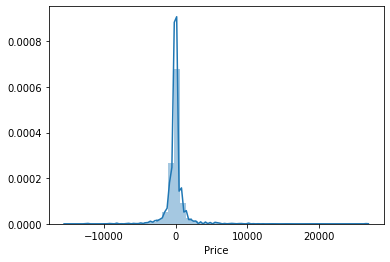

In [66]:
sns.distplot(y_test-y_pred)

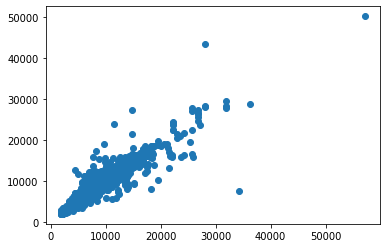

In [67]:
plt.scatter(y_test, y_pred)